

<img src='https://raw.githubusercontent.com/RenoirSampaio/DS-FinalProject/master/brasao.png' height='100px' width='300px'/>

Campus de Sobral

Curso de Engenharia da Computação

Tópicos Especiais em Automação e Controle I

Projeto final de Ciência de Dados: Processo de Ciência de Dados

---


##Etapa 1 - Exploração e Limpeza

## Equipe: 
 - Breno Campos - 406808
 - Renoir Sampaio - 389113
 - Gerônimo Aguiar - 385145
 - Samuel Hericles - 389118
 - Sérgio Neto - 385138

Hipótese ao final do notebook



# 1 Imports necessários


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2 Upload da base dados

#### Usamos o *git lfs(Large File Storage)* para armazenar dados com mais de 25mb. Sendo assim, importamos o dataset de ocorrências do ano de 2019 que ele organizado o dados de acordo com a ocorrência fichada na prf por pessoa.

In [2]:
url = 'https://media.githubusercontent.com/media/RenoirSampaio/DS-FinalProject/master/acidentes2019_todas_causas_tipos.csv'
df = pd.read_csv(url, sep = ';', encoding = 'latin-1')
df.head(15)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,34.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,18.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Passageiro,Lesões Leves,34.0,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102.0,2019-01-01,terça-feira,01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005.0,Condutor,Lesões Leves,27.0,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126.0,2019-01-01,terça-feira,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,Falta de Atenção à Condução,1.0,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,324868,Motoneta,HONDA/C100 BIZ ES,2004.0,Condutor,Lesões Leves,42.0,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR
5,182212.0,402092.0,2019-01-01,terça-feira,00:45:00,SC,101.0,16,GARUVA,Sim,Animais na Pista,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,324863,Automóvel,RENAULT/SANDERO EXP1016V,2009.0,Condutor,Lesões Leves,47.0,Feminino,0,1,0,0,"-26,1216","-48,8826",SR-SC,DEL8/3,UOP01/SC
6,182214.0,402095.0,2019-01-01,terça-feira,00:00:00,CE,20.0,"429,5",FORTALEZA,Sim,Ingestão de Substâncias Psicoativas,1.0,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Viaduto,Sim,324878,Automóvel,TOYOTA/ETIOS HB XS,2013.0,Condutor,Lesões Graves,NaN,Feminino,0,0,1,0,"-3,76999","-38,670063",SR-CE,DEL16/1,UOP02/CE
7,182215.0,403852.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Sim,Falta de Atenção à Condução,1.0,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,326009,Bicicleta,NaN,NaN,Condutor,Lesões Graves,34.0,Masculino,0,0,1,0,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG
8,182215.0,403851.0,2019-01-01,terça-feira,01:00:00,MG,381.0,327,NOVA ERA,Sim,Falta de Atenção à Condução,1.0,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,324928,Automóvel,GM/ASTRA SEDAN ADVANTAGE,2009.0,Condutor,Ileso,45.0,Masculino,1,0,0,0,"-19,7609","-43,0306",SR-MG,DEL4/3,UOP01/MG
9,182216.0,403879.0,2019-01-01,terça-feira,01:50:00,SC,470.0,"42,6",GASPAR,Sim,Ingestão de Substâncias Psicoativas,1.0,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Sim,324875,Automóvel,I/CHEVROLET AGILE LT,2011.0,Condutor,Lesões Leves,26.0,Masculino,0,1,0,0,"-26,875719","-49,003746",SR-SC,DEL8/4,UOP01/SC


# 3 Tratamento dos dados
- 0 para valores nulos caso a coluna seja de dados numéricos;
- Vazios para strings nulas;

In [3]:
df["pesid"].fillna(0, inplace=True)
df["br"].fillna(0, inplace=True)
df["km"].fillna(0, inplace=True)
df["id_veiculo"].fillna(0, inplace=True)
df["marca"].fillna('Vazio', inplace=True)
df["ano_fabricacao_veiculo"].fillna(0, inplace=True)
df["idade"].fillna(0, inplace=True)
df["uop"].fillna('Vazio', inplace=True)
df["tipo_acidente"].fillna('Vazio', inplace=True)
df["ordem_tipo_acidente"].fillna('Vazio', inplace=True)       

In [4]:
df.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_principal           0
causa_acidente            0
ordem_tipo_acidente       0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
id_veiculo                0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
regional                  0
delegacia           

Verificamos que não há mais valores nulos.



# 3.1 Verifiacando de outra forma com a função *info()* do pandas 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331666 entries, 0 to 331665
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      331666 non-null  float64
 1   pesid                   331666 non-null  float64
 2   data_inversa            331666 non-null  object 
 3   dia_semana              331666 non-null  object 
 4   horario                 331666 non-null  object 
 5   uf                      331666 non-null  object 
 6   br                      331666 non-null  float64
 7   km                      331666 non-null  object 
 8   municipio               331666 non-null  object 
 9   causa_principal         331666 non-null  object 
 10  causa_acidente          331666 non-null  object 
 11  ordem_tipo_acidente     331666 non-null  object 
 12  tipo_acidente           331666 non-null  object 
 13  classificacao_acidente  331666 non-null  object 
 14  fase_dia            

Vemos que coluna *Non-Null* estão na mesma quantidade, então não há mais valores nulos por esta abordagem.

# 3.2 Corrigindo os tipos de dados

Há colunas que apresentam valores inteiros, mas estavam na forma de double. Como também, havia datas que estava no formato diferente do habitual de DD-MM-AAAA.



In [6]:
df["pesid"] = df["pesid"].astype(int)
df["ano_fabricacao_veiculo"] = df["ano_fabricacao_veiculo"].astype(int)
df["idade"] = df["idade"].astype(int)
df["data_inversa"] = pd.to_datetime(df["data_inversa"])
df["horario"] = pd.to_datetime(df["horario"])

In [7]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182210.0,402103,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,34,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
1,182210.0,402106,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,18,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
2,182210.0,402104,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Passageiro,Lesões Leves,34,Feminino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
3,182210.0,402102,2019-01-01,terça-feira,2020-09-28 01:30:00,SP,116.0,218,GUARULHOS,Sim,Falta de Atenção à Condução,1,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,324888,Automóvel,PEUGEOT/206 SW 16PRESENC,2005,Condutor,Lesões Leves,27,Masculino,0,1,0,0,"-23,46052014","-46,48772478",SR-SP,DEL6/1,UOP01/SP
4,182211.0,402126,2019-01-01,terça-feira,2020-09-28 01:30:00,PR,373.0,"177,3",PONTA GROSSA,Sim,Falta de Atenção à Condução,1,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,324868,Motoneta,HONDA/C100 BIZ ES,2004,Condutor,Lesões Leves,42,Masculino,0,1,0,0,"-25,05533957","-50,22776753",SR-PR,DEL7/3,UOP01/PR


# 3.3 Tirando idades maiores de 120 anos e menores que 0
Acreditando que não pessoas há pessoas com menos 0 anos(alguns valores negativos) e que diregem e pessoas que com mais de 120 anos digerem.


In [8]:
df.loc[df.idade >= 120, "idade"] = 0
df.loc[df.idade <= 0, "idade"]   = 0

### Exploração Estatística
- Média, variância, correlação

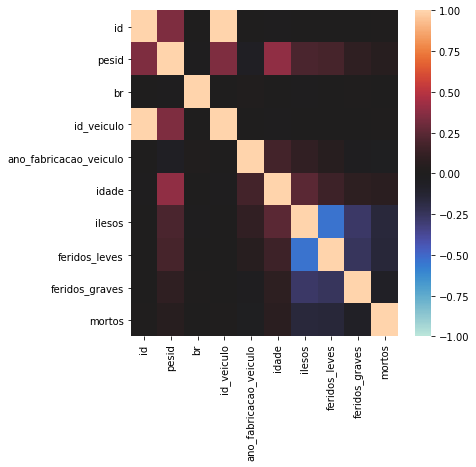

In [9]:
# Matriz de correlação
# Para numeros próximos de 1 aumenta a correlação
# Para numeros próximos de -1 aumenta a correlação de maneira inversa, quandoum sobe o outro aumenta
plt.figure(figsize = (6, 6))
matriz = df.corr() 
sns.heatmap(matriz, vmin=-1, vmax=1, center=0)
plt.show()

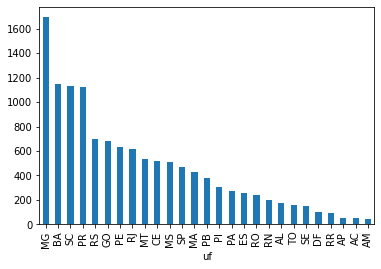

In [10]:
# Agrupamento por estado
df.groupby("uf")["mortos"].sum().sort_values(ascending=False).plot.bar()

In [11]:
# Agrupamento por estado
df_prov = df.loc[df['uf'] == 'MG']
df_prov.groupby("municipio")["mortos"].sum().sort_values(ascending=False).head(10)

municipio
CONTAGEM         58
MONTES CLAROS    57
PATROCINIO       46
POUSO ALEGRE     42
BETIM            35
PARACATU         34
MANHUACU         34
EXTREMA          32
JOAO PINHEIRO    32
ITABIRITO        31
Name: mortos, dtype: int64

In [12]:
# Agrupamento por rodovia
df.groupby("br")["mortos"].sum().sort_values(ascending=False).head(10)

br
101.0    1498
116.0    1491
40.0      508
364.0     493
153.0     477
381.0     436
163.0     423
316.0     371
262.0     346
230.0     337
Name: mortos, dtype: int64

In [13]:
# Agrupamento por municipio
df.groupby("municipio")["mortos"].sum().sort_values(ascending=False).head(10)

municipio
RIACHAO DAS NEVES    167
CAUCAIA              132
CAPAO ALTO           128
BRASILIA             102
PALHOCA               95
FORTALEZA             81
CURITIBA              80
PARANAIBA             71
NOVA ANDRADINA        67
SAO JOSE              67
Name: mortos, dtype: int64

Text(0, 0.5, 'mortos')

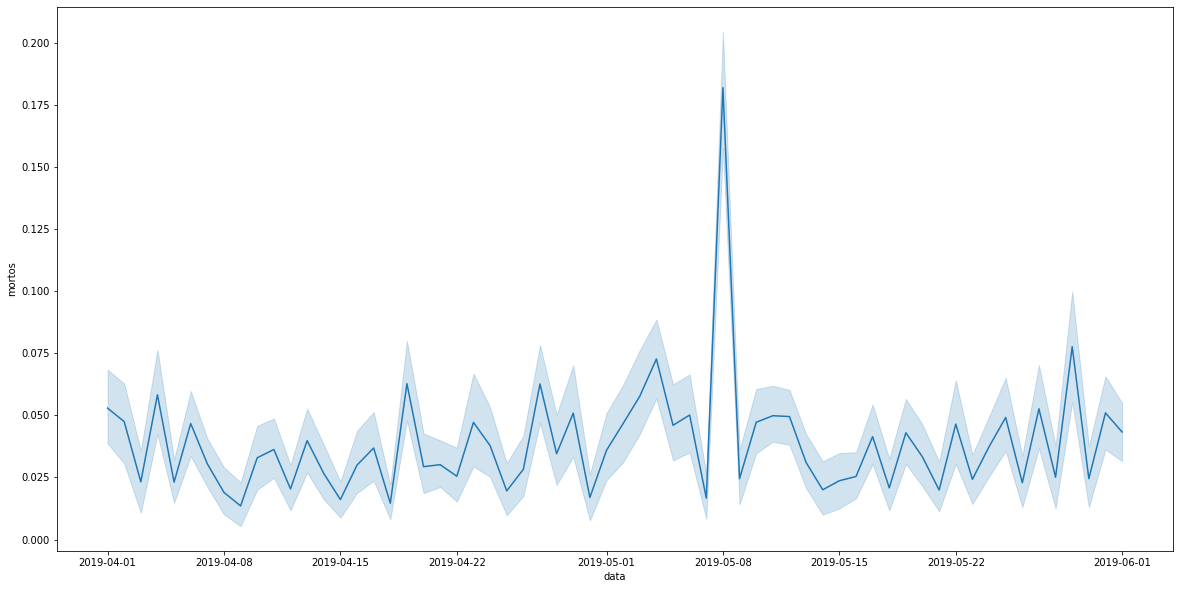

In [14]:
df_prov = df.loc[df['data_inversa'] >= '2019-04']
df_prov = df_prov.loc[df_prov['data_inversa'] <= '2019-06']
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df_prov['data_inversa'], y = df_prov['mortos'])
g.set_xlabel('data')
g.set_ylabel('mortos')

Text(0, 0.5, 'feridos_graves')

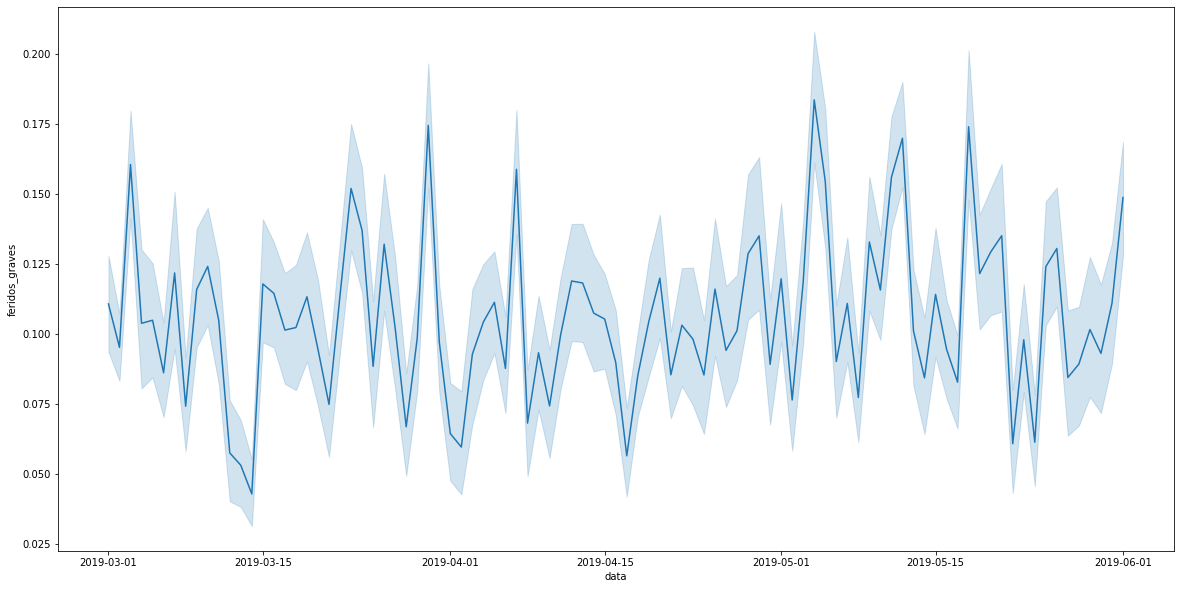

In [15]:
df_prov = df.loc[df['data_inversa'] >= '2019-03']
df_prov = df_prov.loc[df_prov['data_inversa'] <= '2019-06']
plt.figure(figsize=(20, 10))
g = sns.lineplot(x = df_prov['data_inversa'], y = df_prov['feridos_graves'])
g.set_xlabel('data')
g.set_ylabel('feridos_graves')

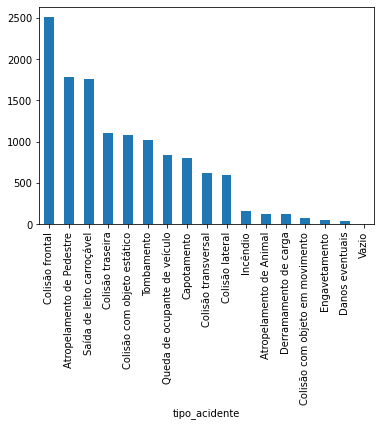

In [16]:
df.groupby("tipo_acidente")["mortos"].sum().sort_values(ascending=False).plot.bar()

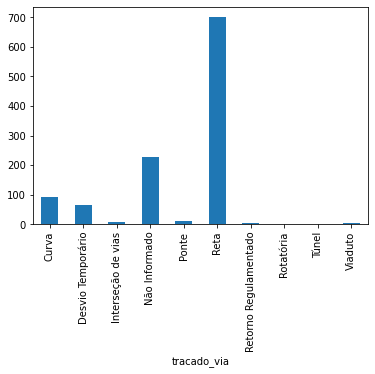

In [17]:
df_prov = df.loc[df['tipo_acidente'] == 'Colisão traseira']
df_prov = df_prov.groupby("tracado_via")["mortos"].sum().plot.bar()

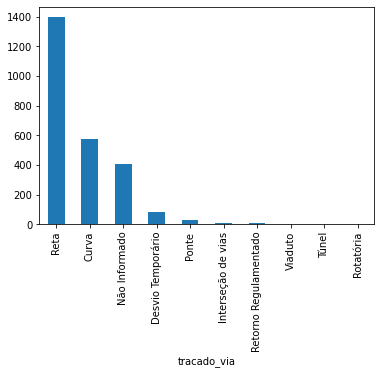

In [18]:
df_prov = df.loc[df['tipo_acidente'] == 'Colisão frontal']
df_prov = df_prov.groupby("tracado_via")["mortos"].sum().sort_values(ascending=False).plot.bar()

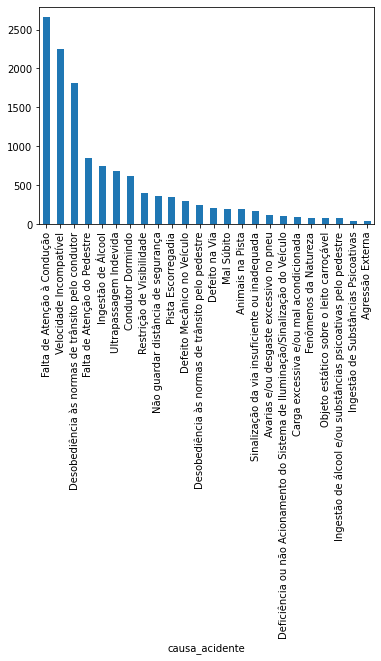

In [19]:
df_prov = df.groupby("causa_acidente")["mortos"].sum().sort_values(ascending=False)
df_prov.plot.bar()

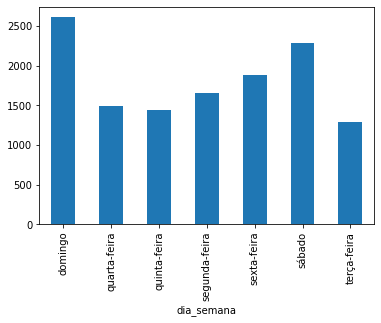

In [20]:
df.groupby("dia_semana")["mortos"].sum().plot.bar()

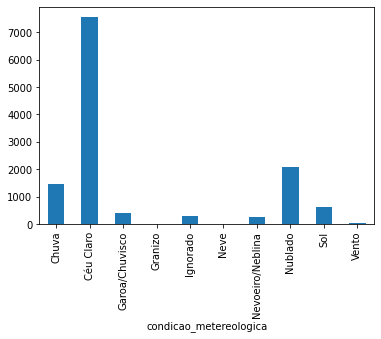

In [21]:
df.groupby("condicao_metereologica")["mortos"].sum().plot.bar()

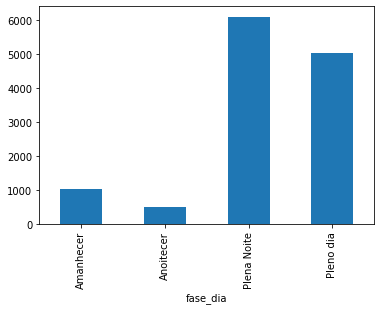

In [22]:
df.groupby("fase_dia")["mortos"].sum().plot.bar()

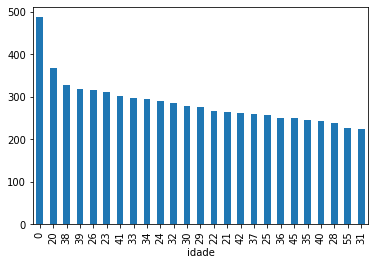

In [23]:
# colocar em intervalos
df.groupby("idade")["mortos"].sum().sort_values(ascending=False).head(25).plot.bar()

### Hipóteses ML
<!-- - Regressão por séries temporais -->
- Probabilidade de acidentes acontecerem, dado certas informações.
- Iremos prever os riscos de acidentes baseado nos parâmetros de entrada.
  - Entrada
    - BR
    - Idade
    - Município
    - Fase Dia    
    - Condicao Metereológica
    - Dia Semana
  - Saída
    - Previsão da quantidade de acidentes baseando-se nos dados inseridos.
    - Sendo um percentual (Previsão / Somatório de acidentes do dataset).
    - Com isso intervalos de percentual serão dividos para classificar a
periculosidade do trecho.